In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt

In [88]:
#optional : Enable Browser Notification 
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

In [33]:
data_original = pd.read_csv("train.csv")

In [34]:
data_df = data_original.iloc[:,1:]

In [35]:
data_df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


# Encoding

In [36]:
data_encoded = data_df.copy()
LE = LabelEncoder()
LE.fit(data_df.target.unique()) #fit the classes names
data_encoded.target = LE.transform(data_df.target)

Before the next step (normalization) I have to separate the labels column from the features

In [37]:
X = data_encoded.iloc[:,0:len(data_encoded.columns)-1]
X = X.astype(float)
Y = data_encoded.iloc[:,len(data_encoded.columns)-1]

# Normalization

In [29]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.402093,-0.210106,-0.307165,-0.279443,-0.161867,-0.119331,-0.188045,-0.293664,-0.291038,-0.243606,...,-0.061446,0.246100,-0.420870,-0.249802,-0.413584,-0.299712,-0.176699,-0.129516,-0.386938,-0.104963
1,-0.253508,-0.210106,-0.307165,-0.279443,-0.161867,-0.119331,-0.188045,0.149647,-0.291038,-0.243606,...,-0.061446,-0.280099,-0.420870,-0.249802,-0.413584,-0.299712,-0.176699,-0.129516,-0.386938,-0.104963
2,-0.253508,-0.210106,-0.307165,-0.279443,-0.161867,-0.119331,-0.188045,0.149647,-0.291038,-0.243606,...,-0.061446,-0.280099,-0.420870,-0.249802,-0.413584,-0.299712,-0.176699,-0.129516,-0.386938,-0.104963
3,0.402093,-0.210106,-0.307165,0.079240,13.508710,4.524667,4.665884,-0.293664,-0.291038,0.679472,...,19.044887,-0.280099,-0.047949,1.019683,-0.413584,-0.299712,-0.176699,-0.129516,-0.386938,-0.104963
4,-0.253508,-0.210106,-0.307165,-0.279443,-0.161867,-0.119331,-0.188045,-0.293664,-0.291038,-0.243606,...,-0.061446,0.246100,-0.420870,-0.249802,-0.413584,-0.299712,0.040798,-0.129516,-0.386938,-0.104963


# Understanding the dataset better

I'll attempt to, first, know the distripution of the data over the classes to see if there is a reasonable balance.

<BarContainer object of 9 artists>

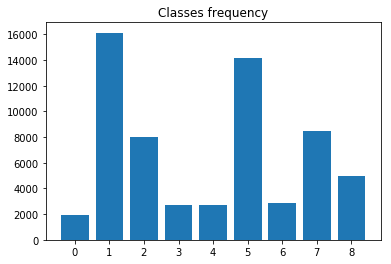

In [51]:
from collections import Counter
plt.xticks(range(9))
plt.title("Classes frequency")
plt.bar(range(9),dict(Counter(Y)).values())

The graph shows that the data is not balanced, which might cause a bias in the prediction. I'll try to solve this issue by downsampling.

*Note: I used the following command to install `imblearn` library :*<br>
```  python
pip install imblearn ```

In [65]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(X_scaled, Y)
X_undersampled, Y_undersampled = rus.fit_resample(X, Y)

<BarContainer object of 9 artists>

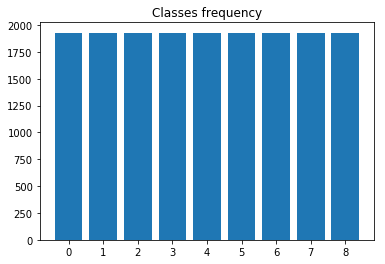

In [61]:
plt.xticks(range(9))
plt.title("Classes frequency")
plt.bar(range(9),dict(Counter(Y_undersampled)).values())

In [62]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
rus.fit(X_scaled, Y)
X_oversampled, Y_oversampled = rus.fit_resample(X, Y)

<BarContainer object of 9 artists>

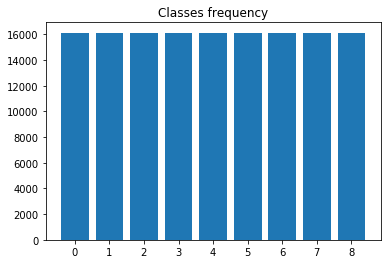

In [63]:
plt.xticks(range(9))
plt.title("Classes frequency")
plt.bar(range(9),dict(Counter(Y_oversampled)).values())

I'm planning to try both oversampled and undersampled version of the data for the models.

# Modeling

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, Y_undersampled, test_size=0.2, random_state=42)
y_train.shape

(13888,)

### Shooting in the dark
First, I'll brute-force search through the most famous classifiers  and see which ones perform the best. Then I'm planning to pick the best 3 and try to enhance their performance

LR: 0.719686 (0.000216)
LDA: 0.658050 (0.003816)
KNN: 0.690164 (0.002664)
CART: 0.608655 (0.001368)
NB: 0.587270 (0.001440)
SVM: 0.700533 (0.004104)
RF: 0.745104 (0.002304)
ADA: 0.587414 (0.003168)
EXT: 0.754536 (0.000504)
GB: 0.726599 (0.003384)
XGB: 0.730343 (0.002088)


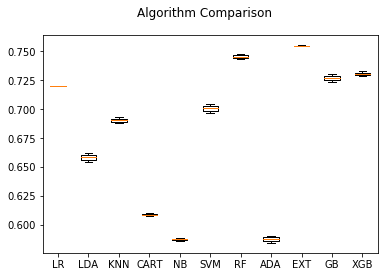

In [73]:
# Compare Algorithms

# prepare configuration for cross validation test harness
seed = 7
# prepare models
n_estimators=50
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators = n_estimators, random_state = seed)))
models.append(('ADA', AdaBoostClassifier(n_estimators=n_estimators, random_state=seed)))
models.append(('EXT', ExtraTreesClassifier(n_estimators=n_estimators, random_state=seed)))
models.append(('GB', GradientBoostingClassifier(n_estimators=n_estimators, random_state=seed)))
models.append(('XGB',XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=2, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that ExtraTreesClassifier, RandomForest, xGBoost performed the best

# Being more specific
Now that I have an idea on what models will perform better, I'll try to optimize each model required in the homework document, following this order:<br>
1.	Multi-layer Perceptron (MLP)
1.	K-Nearest Neighbours
1.	Support Vector Machines
1.	Random Forest
1.	XGBoost Methods


## MLP
Reading through the theory of the neural network provides little as to how to decide the optimal size/number of hidden layers in the network. So we'll need to grid-search the structure.

In [90]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [81]:
# parameters = {'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
parameters = {'max_iter': [1000,2000], 'alpha': 10.0 ** -np.arange(1, 2), 'hidden_layer_sizes':np.arange(10, 100,10), 'random_state':[0,1]}
mlp_clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1,verbose=10)
mlp_clf.fit(X_undersampled,Y_undersampled)
print(mlp_clf.score(X_undersampled, Y_undersampled))
print(mlp_clf.best_params_)

C:\Users\pcroot\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 104 out of 108 | elapsed:  6.7min remaining:   15.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  6.9min finished


0.9197050861125511
{'alpha': 0.1, 'hidden_layer_sizes': 90, 'max_iter': 1000, 'random_state': 1}


In [89]:
%%notify
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, Y_undersampled, test_size=0.2, random_state=42)

mlp_model = MLPClassifier()
mlp_model.set_params(**clf.best_params_)
mlp_model.fit(X_train,y_train)
y_pred = mlp_model.predict(X_test)

<IPython.core.display.Javascript object>

In [91]:
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       422
           1       0.55      0.60      0.57       364
           2       0.58      0.52      0.55       416
           3       0.70      0.70      0.70       384
           4       0.97      0.98      0.97       404
           5       0.88      0.87      0.88       403
           6       0.73      0.83      0.77       338
           7       0.87      0.84      0.85       393
           8       0.75      0.82      0.78       349

   micro avg       0.76      0.76      0.76      3473
   macro avg       0.75      0.76      0.75      3473
weighted avg       0.76      0.76      0.75      3473

0.755254822919666


In [22]:
kfold = model_selection.KFold(n_splits=2, random_state=7)
cv_results = model_selection.cross_val_score(mlp_model, X_train, y_train, cv=kfold, scoring='accuracy')

C:\Users\pcroot\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pcroot\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## K-Nearest Neighbours

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [99]:
%%notify
parameters = {'n_neighbors': [ 9, 30, 70], 'metric': ['minkowski', 'euclidean']}
knn_clf = GridSearchCV(KNeighborsClassifier(), parameters, n_jobs=-1,verbose=10)
knn_clf.fit(X_undersampled,Y_undersampled)
print(knn_clf.score(X_undersampled, Y_undersampled))
print(knn_clf.best_params_)

C:\Users\pcroot\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:  1.1min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:  1.2min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  2.0min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  2.1min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  2.2min remaining:   51.7s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  2.3min remaining:   27.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.8min finished


0.7852082253326421
{'metric': 'minkowski', 'n_neighbors': 9}


<IPython.core.display.Javascript object>

## Support Vector Machines

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [102]:
%%notify
Cs = [0.001, 10,30,100]
gammas = [0.001, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svc_clf = GridSearchCV(SVC(), param_grid, n_jobs=-1,verbose=10)
svc_clf.fit(X_undersampled,Y_undersampled)
print(svc_clf.score(X_undersampled, Y_undersampled))
print(svc_clf.best_params_)

C:\Users\pcroot\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  1.6min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  2.1min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  2.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  2.2min remaining:   44.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.0min finished


0.8194804446748459
{'C': 10, 'gamma': 0.001}


<IPython.core.display.Javascript object>

In [103]:
%%notify
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, Y_undersampled, test_size=0.2, random_state=42)

svc_model = SVC()
svc_model.set_params(**clf.best_params_)
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)

<IPython.core.display.Javascript object>

In [104]:
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       409
           1       0.58      0.65      0.61       354
           2       0.62      0.57      0.59       410
           3       0.70      0.72      0.71       376
           4       0.97      0.98      0.97       399
           5       0.91      0.89      0.90       408
           6       0.80      0.84      0.82       366
           7       0.86      0.87      0.87       371
           8       0.82      0.82      0.82       380

   micro avg       0.78      0.78      0.78      3473
   macro avg       0.78      0.78      0.78      3473
weighted avg       0.78      0.78      0.78      3473

0.7808810826374892


## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [109]:
%%notify
param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [50,100,200],
    'criterion' :['entropy']
}
rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1,cv=10,verbose=10)
rf_clf.fit(X_undersampled,Y_undersampled)
print(rf_clf.score(X_undersampled, Y_undersampled))
print(rf_clf.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 13

1.0
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'n_estimators': 1000}


<IPython.core.display.Javascript object>

In [115]:
%%notify
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, Y_undersampled, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.set_params(**clf.best_params_)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [116]:
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [12376, 3473]

## XGBoost Methods

In [117]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
%%notify
param_grid = {
    'max_depth': [2,4], #[3,4,5,6,7,8,9], # 5 is good but takes too long in kaggle env
    'subsample': [0.4,1], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.5], #[0.5,0.6,0.7,0.8],
    'n_estimators': [1000,3000], #[1000,2000,3000]
    'reg_alpha': [0.01] #[0.01, 0.02, 0.03, 0.04]
}
xgb_clf = GridSearchCV(XGBClassifier(), param_grid, n_jobs=-1,cv=1000,verbose=10)
xgb_clf.fit(X_undersampled,Y_undersampled)
print(xgb_clf.score(X_undersampled, Y_undersampled))
print(xgb_clf.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
